## HI Mass Fraction -- Stellar Mass Plot

Just a plot of HI mass fraction against stellar mass

Based on code by Emily Harrington, modified by Karen Masters. 

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import hist
%matplotlib notebook
from astropy.io import fits
import pandas as pd
from astropy.io import ascii
import pandas as pandas

In [3]:
HImanga = fits.open('mangahi_dr4_012324.fits')
HImanga = HImanga[1].data

In [4]:
print(HImanga.columns)

ColDefs(
    name = 'PLATEIFU'; format = '11A'
    name = 'MANGAID'; format = '9A'
    name = 'OBJRA'; format = 'D'
    name = 'OBJDEC'; format = 'D'
    name = 'LOGMSTARS'; format = 'D'
    name = 'SINI'; format = 'D'
    name = 'VOPT'; format = 'E'
    name = 'SESSION'; format = '111A'
    name = 'EXP'; format = 'E'
    name = 'RMS'; format = 'E'
    name = 'LOGHILIM200KMS'; format = 'E'
    name = 'PEAK'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'FHI'; format = 'E'
    name = 'EFHI'; format = 'E'
    name = 'LOGMHI'; format = 'E'
    name = 'VHI'; format = 'E'
    name = 'EV'; format = 'E'
    name = 'WM50'; format = 'E'
    name = 'WP50'; format = 'E'
    name = 'WP20'; format = 'E'
    name = 'W2P50'; format = 'E'
    name = 'WF50'; format = 'E'
    name = 'DW'; format = 'E'
    name = 'PR'; format = 'E'
    name = 'PL'; format = 'E'
    name = 'AR'; format = 'E'
    name = 'BR'; format = 'E'
    name = 'AL'; format = 'E'
    name = 'BL'; format = 'E'
    name = 'NEG

In [5]:
HI_pipe3d=HImanga
good = np.where(HI_pipe3d["snr"] > 5)
weak = np.where(HI_pipe3d["logMHI"] > 0)
non = np.where(HI_pipe3d["logMHI"] < 0)


In [6]:
gbt=np.where(HI_pipe3d["session"] != 'ALFALFA')

HImass = HI_pipe3d["logMHI"]

HImass_good = HImass[good]
HImass_weak = HImass[weak]
HImass_non = HI_pipe3d["logHIlim200kms"][non]


HImassfrac = HImass_good - HI_pipe3d["LOGMSTARS"][good]
HImassfrac2 = HImass_weak - HI_pipe3d["LOGMSTARS"][weak]
HImassfraclim = HImass_non - HI_pipe3d["LOGMSTARS"][non]



In [7]:
print(len(HImass))

7100


<IPython.core.display.Javascript object>


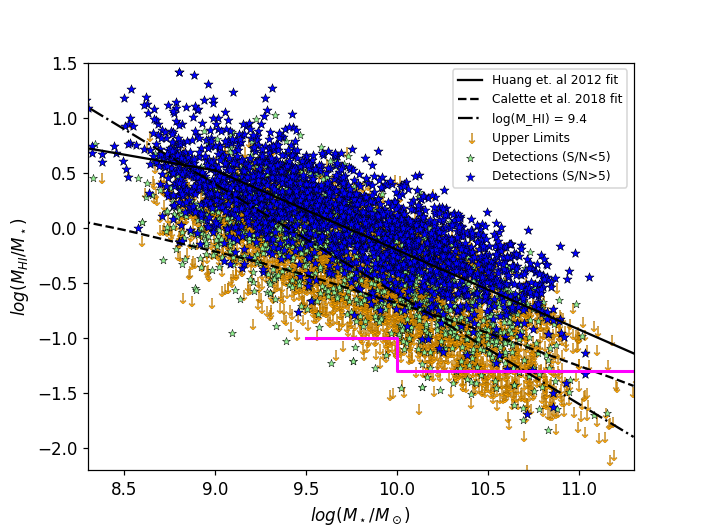

In [8]:
plt.rcParams.update({'font.size': 11})

plt.figure(1)
plt.ylabel("$log(M_{HI}/M_\star)$")
plt.xlabel("$log(M_\star/M_\odot)$")
plt.ylim(-2.2,1.5)
plt.xlim(8.3,11.3)

plt.scatter(HI_pipe3d["LOGMSTARS"][non], HImassfraclim, marker = r'$\downarrow$', s = 50, color = "orange", linewidth=0.1, edgecolor="black", label = "Upper Limits")
plt.scatter(HI_pipe3d["LOGMSTARS"][weak], HImassfrac2, marker = "*", s = 30, color = "lightgreen", linewidth=0.3, edgecolor="black", label = "Detections (S/N<5)")
plt.scatter(HI_pipe3d["LOGMSTARS"][good], HImassfrac, marker = "*", s = 40, color = "blue", linewidth=0.3, edgecolor="black", label = "Detections (S/N>5)")
lowmass = np.array([8.2,9])
highmass = np.array([9.00000001, 11.3])
f1 = 0.712 * lowmass + 3.117 - lowmass
f2 = 0.276* highmass +7.042 -highmass
mass = np.array([8.2,8.5,9.2,9.5,10.2,10.5,11.2,11.3])
f3 = np.log10(0.98/((10**(mass-9.24))**0.21 + (10**(mass-9.24))**0.67))
f4 = np.log10(0.02/((10**(mass-9.00))**0.00 + (10**(mass-9.00))**0.58))
f5 = 9.4*(mass/mass)-mass
plt.plot(lowmass, f1, "black")
plt.plot(highmass, f2, "black", label = "Huang et. al 2012 fit")
plt.plot(mass,f3,"black",linestyle="--", label= "Calette et al. 2018 fit")
plt.plot(mass,f5,"black",linestyle="-.", label= "log(M_HI) = 9.4")
plt.plot([9.5,10.0,10.0,12.0],[np.log10(0.1),np.log10(0.1),np.log10(0.05),np.log10(0.05)],"magenta",linewidth=2)
plt.legend(loc=1,fontsize = '8')
plt.savefig('proposal_Fig2.png')